In [1]:
# 코랩 한글 설정: 실행하고 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,072 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122519 files and di

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df_total = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/total.xlsx', index_col = None)
df_total.head()

,date,name,title,content
0,2018-01-01,연합뉴스,"""집 파느니 증여한다""…잇단 규제에 주택 매매↓, 증여↑",주택 증여 작년 11월까지 8만 건 육박…역대 최대 전망2년 연속 100만 건 넘었...
1,2018-01-01,조선비즈,[아파트 별곡]① 자산증식 욕망이 불패 신기루 만들어…주거대안 화두에 진화 거듭,대한민국은 아파트 공화국이다. 우리나라 집 10채 중 6채는 아파트다. 아파트에 열...
2,2018-01-01,서울경제,"[2018년 주목! 여기] 4청량리 역세권, 교통망·주거환경 개선 동시에...일대 ...",경강선 이어 올 8월 분당선 연장집창촌은 도심 랜드마크 변신중미주 전용 86.78㎡...
3,2018-01-01,파이낸셜뉴스,서울 아파트 4.69% 오를 때 지방은 0.41% 하락,5년여만에 전세가격 내려.. 수도권 1.4% 올라 대조적 ...
4,2018-01-01,스포츠서울,"[부동산 理實直告]아파트,관리비예치금과 장기수선충담금은 계륵?",[스포츠서울]일반적으로 부동산을 거래한다는 것은 매매계약을 말한다. 하지만 임대차계...


In [ ]:
df_2020 = pd.read_excel('/content/2020년(단어 포함) 본문 단어 빈도수.xlsx', index_col = None)
df_2020.head()

,word,freq
0,.,115420
1,이,82438
2,(,51296
3,을,48038
4,가,47520


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 40.3 MB/s eta 0:00:00


In [ ]:
import re

# 문자열로 변환
df_2020['word'] = df_2020['word'].astype(str)

# 정규식을 이용하여 특수기호 제거 및 2글자 이상인 단어만 추출
df_2020['word'] = df_2020['word'].apply(lambda x: re.sub('[^ㄱ-ㅣ가-힣]', '',x))  # 특수기호 제거
df_2020 = df_2020[df_2020['word'].str.len() >= 2]  # 2글자 이상인 단어만 추출

df_2020.reset_index(drop = True, inplace = True)

In [ ]:
df_2020 = pd.DataFrame(df_2020.groupby(['word'])['freq'].sum()).reset_index()
df_2020

,word,freq
0,ㅇㅇ,1
1,ㅋㅋ,5
2,ㅎㅎ,11
3,가가,1309
4,가게,7
...,...,...
34665,힘쓰고,4
34666,힘쓰기,1
34667,힘쓸,4
34668,힘주어,1


In [ ]:
df_2020[df_2020['word']=='아파트']

,word,freq
20334,아파트,41796


In [ ]:
df_2020[df_2020['word']=='상승세']
# 상승-18281, 하락-6305, 상승세-4759

,word,freq
50,상승세,4759


In [ ]:
df_2020.sort_values(by = 'freq', inplace = True, ascending = False)
df_2020.reset_index(drop = True, inplace = True)
df_2020.head(50)

,word,freq
0,아파트,41796
1,으로,38664
2,서울,29325
3,했다,23949
4,가격,20376
5,에서,19555
6,상승,18281
7,거래,17531
8,만원,17447
9,주택,15594


In [ ]:
df_total.insert(1, 'year', pd.to_datetime(df_total['date']).dt.year)
df_2020_news = df_total[df_total['year'] == 2020]
df_2020_news.head()

,date,year,name,title,content
11263,2020-01-01,2020,아시아경제,지난달(12월) 아파트 매매 실거래가,작년 12월 아파트 매매 실거래가는 다음과 같다.서울지역의 아파트 매매가를 살펴보면...
11264,2020-01-01,2020,서울경제,12·16대책 전 한달간 서울 아파트값 1.24% 상승,[서울경제] 12·16 대책 시행 전 한 달여 동안 서울 아파트 매매가격이 1.24...
11265,2020-01-02,2020,SBS,서울 아파트값 뛰자 오피스텔 매매가도 2분기 연속 상승,▲ 위 사진은 기사 내용과 관련이 없습니다.서울 아파트값 상승의 영향으로 오피스텔 ...
11266,2020-01-02,2020,SBS Biz,아파트 매매값 상승폭 둔화…인기지역 전셋값은 ‘고공행진’,[앵커]작년 12.16 부동산 대책 영향으로 서울 아파트값 상승세가 한풀 꺾였는데요...
11267,2020-01-02,2020,한국경제TV,서울 아파트값 2주 연속 상승폭 축소…12·16대책 영향,정부의 고강도 부동산 규제인 12·16 부동산 대책 이후 서울 아파트 가격 상승폭이...


In [ ]:
df_2020_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5168 entries, 11263 to 16430
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     5168 non-null   object
 1   year     5168 non-null   int64 
 2   name     5168 non-null   object
 3   title    5168 non-null   object
 4   content  5168 non-null   object
dtypes: int64(1), object(4)
memory usage: 242.2+ KB


In [ ]:
# df_2020_news.insert(2, 'month', pd.to_datetime(df_2020_news['date']).dt.month)
df_2020_news_4q = df_2020_news[(df_2020_news['month'] >= 10) & (df_2020_news['month'] <= 12)]
df_2020_news_4q.head()

,date,year,month,name,title,content
15045,2020-10-01,2020,10,이데일리,안전진단 탈락 여파?…목동 아파트 ‘찬바람’,목동9단지 2차 안전진단 탈락나머지 단지도 불안 여전9월 들어 매매 전무…호가도 낮...
15046,2020-10-02,2020,10,조선일보,서울 저가 아파트값 2년새 35%↑... 서민 내집마련 꿈 ‘가물’,10년 가까이 2억5000만원 안팎에서 움직이던 서울의 저가 아파트값(매매가 하위 ...
15047,2020-10-03,2020,10,한국경제,대출 규제에도 '15억 초과' 아파트 매매 급증한 진짜 이유 [최진석의 부동산 팩트체크],사진=연합뉴스정부의 강한 대출 규제에도 불구하고 서울에서 15억원 넘는 아파트 매매...
15048,2020-10-04,2020,10,MBN,서울 아파트 전셋값 66주 연속 올라…강남 4구 등 상승폭 확대,수도권 아파트 전셋값이 60주 연속 상승하며 불안한 모습을 이어가고 있습니다.특히 ...
15049,2020-10-04,2020,10,헤럴드경제,서울 아파트 전셋값 66주 연속 상승…강남4구 오름폭 확대,수도권 전셋값도 60주째 상승안산·광명시 등 상승폭 커서울 아파트 매매가 6주 연속...


In [ ]:
import pandas as pd
from konlpy.tag import Okt
from tqdm import tqdm

# okt 객체 생성
okt = Okt()

# content 열에서 Null 값 제거
news_article = df_2020_news_4q.dropna(subset=['content'])

# content 열의 모든 문장에 대해 형태소 분석을 수행하고, 그 결과를 'morphs' 열에 저장
news_article['morphs'] = news_article['content'].apply(lambda x: okt.morphs(str(x)))

# 단어 집합(vocabulary) 생성
vocabulary = {}
for i in tqdm(news_article['morphs']):
    for j in i:
        if j not in vocabulary:
            vocabulary[j] = 0
        vocabulary[j] += 1

# 빈도수가 높은 순으로 정렬된 단어 리스트 생성
word_list = sorted(vocabulary.items(), key=lambda x: x[1], reverse=True)

# 결과를 엑셀 파일로 저장(단어 포함)
result_df = pd.DataFrame(word_list, columns=['word', 'freq'])
result_df.to_excel('./2020년 4분기(단어 포함) 본문 단어 빈도수.xlsx', index=False)


# 결과를 엑셀 파일로 저장(단어 미포함)
# word_list = sorted([(k, v) for k, v in vocabulary.items() if k not in ['서울', '아파트', '매매']], key=lambda x: x[1], reverse=True) # '서울', '아파트', '매매'를 제외한 vocabulary 딕셔너리에서 빈도수가 높은 순으로 정렬된 단어 리스트 생성
# result_df = pd.DataFrame(word_list, columns=['word', 'freq'])
# result_df.to_excel('./2020년(단어 미포함) 본문 단어 빈도수.xlsx', index=False)

100%|██████████| 1386/1386 [00:00<00:00, 4121.77it/s]


In [ ]:
df_2020_news_4q_word = pd.read_excel('/content/2020년 4분기(단어 포함) 본문 단어 빈도수.xlsx', index_col = None)
df_2020_news_4q_word.head()

,word,freq
0,.,32217
1,이,22457
2,(,14112
3,을,13880
4,",",13483


In [ ]:
import re

# 문자열로 변환
df_2020_news_4q_word['word'] = df_2020_news_4q_word['word'].astype(str)

# 정규식을 이용하여 특수기호 제거 및 2글자 이상인 단어만 추출
df_2020_news_4q_word['word'] = df_2020_news_4q_word['word'].apply(lambda x: re.sub('[^ㄱ-ㅣ가-힣]', '',x))  # 특수기호 제거
df_2020_news_4q_word = df_2020_news_4q_word[df_2020_news_4q_word['word'].str.len() >= 2]  # 2글자 이상인 단어만 추출

df_2020_news_4q_word.reset_index(drop = True, inplace = True)

In [ ]:
df_2020_news_4q_word = pd.DataFrame(df_2020_news_4q_word.groupby(['word'])['freq'].sum()).reset_index()
df_2020_news_4q_word.head()

,word,freq
0,ㅇㅇ,1
1,ㅎㅎ,11
2,가가,359
3,가겠다,1
4,가격,5554


In [ ]:
df_2020_news_4q_word[df_2020_news_4q_word['word'] == '상승']

,word,freq
9450,상승,5285


In [ ]:
df_2020_news_4q_word[df_2020_news_4q_word['word'] == '하락']

,word,freq
18234,하락,587


In [ ]:
# 2020년 1분기: 상승 - 3705, 하락 - 2198
# 2020년 2분기: 상승 - 4728, 하락 - 2527
# 2020년 3분기: 상승 - 4563, 하락 - 993
# 2020년 4분기: 상승 - 5285, 하락 - 587

In [ ]:
df_2020_2words = pd.DataFrame({'date':['2020년 1분기', '2020년 2분기', '2020년 3분기', '2020년 4분기'], '상승':[3705, 4728, 4563, 5285], '하락':[2198, 2527, 993, 587]}, index=range(4))
df_2020_2words

,date,상승,하락
0,2020년 1분기,3705,2198
1,2020년 2분기,4728,2527
2,2020년 3분기,4563,993
3,2020년 4분기,5285,587


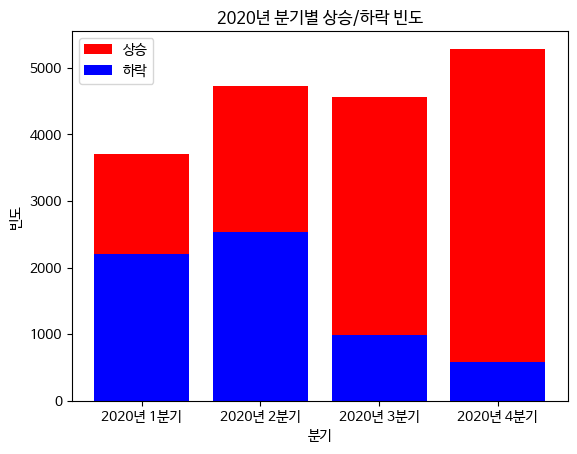

In [ ]:
import matplotlib.pyplot as plt

# 막대 그래프 그리기
plt.bar(df_2020_2words['date'], df_2020_2words['상승'], color='red', label='상승')
plt.bar(df_2020_2words['date'], df_2020_2words['하락'], color='blue', label='하락')
plt.legend()
plt.xlabel('분기')
plt.ylabel('빈도')
plt.title('2020년 분기별 상승/하락 빈도')
plt.show()

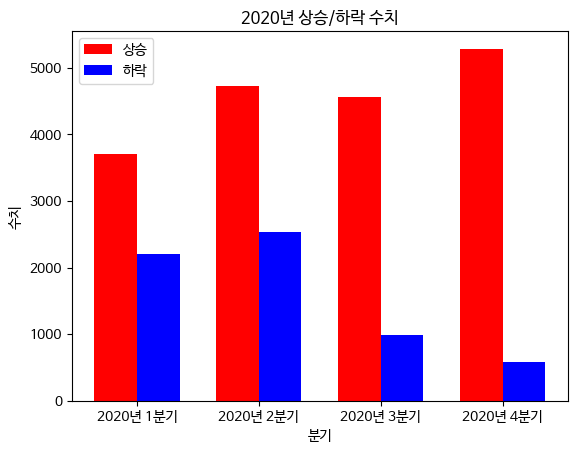

In [ ]:
import matplotlib.pyplot as plt

# 막대 그래프 그리기
bar_width = 0.35
r1 = np.arange(len(df_2020_2words['date']))
r2 = [x + bar_width for x in r1]

plt.bar(r1, df_2020_2words['상승'], color='red', width=bar_width, label='상승')
plt.bar(r2, df_2020_2words['하락'], color='blue', width=bar_width, label='하락')

# 축과 레이블 설정
plt.xlabel('분기')
plt.ylabel('수치')
plt.xticks([r + bar_width / 2 for r in range(len(df_2020_2words['date']))], df_2020_2words['date'])
plt.title('2020년 상승/하락 수치')
plt.legend()

plt.show()

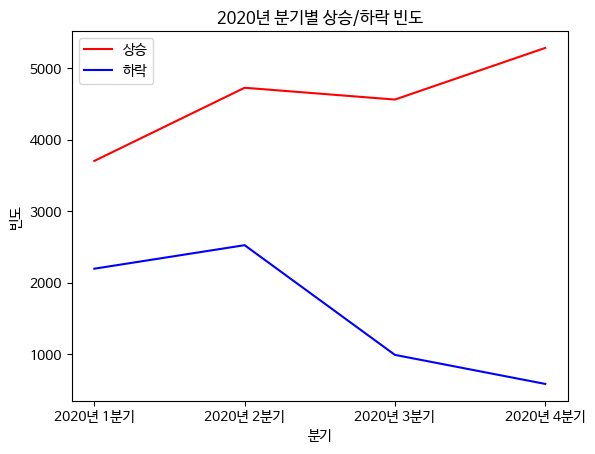

In [ ]:
# 꺾은선 그래프 그리기
plt.plot(df_2020_2words['date'], df_2020_2words['상승'], color='red', label='상승')
plt.plot(df_2020_2words['date'], df_2020_2words['하락'], color='blue', label='하락')
plt.legend()
plt.xlabel('분기')
plt.ylabel('빈도')
plt.title('2020년 분기별 상승/하락 빈도')
plt.show()

In [2]:
df_price = pd.read_excel('/content/월간 아파트 지수 통계.xlsx', index_col = None)
df_price

,Unnamed: 0,서울,변환값
0,2018-01-01,65.602,0.000000
1,2018-02-01,66.249,0.018467
2,2018-03-01,67.080,0.042185
3,2018-04-01,67.624,0.057712
4,2018-05-01,67.893,0.065390
5,2018-06-01,68.158,0.072954
6,2018-07-01,68.518,0.083229
7,2018-08-01,69.318,0.106062
8,2018-09-01,71.976,0.181927
9,2018-10-01,73.300,0.219717


In [3]:
df_avg = df_price.groupby(np.arange(len(df_price)) // 3).apply(lambda x: x.mean()) # row를 3개씩 묶어서 평균 내기
df_avg

<ipython-input-3-754dfe856906>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_avg = df_price.groupby(np.arange(len(df_price)) // 3).apply(lambda x: x.mean()) # row를 3개씩 묶어서 평균 내기
<ipython-input-3-754dfe856906>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_avg = df_price.groupby(np.arange(len(df_price)) // 3).apply(lambda x: x.mean()) # row를 3개씩 묶어서 평균 내기
<ipython-input-3-754dfe856906>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In ad

,서울,변환값
0,66.310333,0.020217
1,67.891667,0.065352
2,69.937333,0.123739
3,73.519333,0.225977
4,73.572333,0.227490
5,73.312667,0.220078
6,73.839000,0.235101
7,75.134667,0.272082
8,76.764000,0.318587
9,77.521333,0.340202


In [4]:
df_avg.rename(columns = {'서울':'avg'}, inplace = True)
df_avg.drop(columns = '변환값', inplace = True)
df_avg

,avg
0,66.310333
1,67.891667
2,69.937333
3,73.519333
4,73.572333
5,73.312667
6,73.839000
7,75.134667
8,76.764000
9,77.521333


In [5]:
df_people = pd.read_excel('/content/부동산심리지수_각분기별_평균값.xlsx', index_col = None)
df_people

,date,mean
0,2018-01-01,123.133333
1,2018-04-01,108.133333
2,2018-07-01,121.866667
3,2018-10-01,105.166667
4,2019-01-01,93.266667
5,2019-04-01,100.633333
6,2019-07-01,120.033333
7,2019-10-01,128.633333
8,2020-01-01,115.466667
9,2020-04-01,115.533333


In [6]:
df_count = pd.read_excel('/content/2018 ~ 2022 분기별 합.xlsx', index_col = None)
df_count = df_count.rename(columns = {'Unnamed: 0': 'date'})
df_count

,date,서울
0,2018 1분기,54190
1,2018 2분기,31455
2,2018 3분기,44394
3,2018 4분기,31047
4,2019 1분기,18089
5,2019 2분기,24758
6,2019 3분기,39040
7,2019 4분기,47723
8,2020 1분기,49581
9,2020 2분기,32860


In [7]:
df_final = pd.concat([df_count, df_people['mean'], df_avg['avg']], axis = 1)
df_final.head()

,date,서울,mean,avg
0,2018 1분기,54190,123.133333,66.310333
1,2018 2분기,31455,108.133333,67.891667
2,2018 3분기,44394,121.866667,69.937333
3,2018 4분기,31047,105.166667,73.519333
4,2019 1분기,18089,93.266667,73.572333


In [ ]:
df_final['avg'][8:12]

8     76.764000
9     77.521333
10    81.078667
11    84.543333
Name: avg, dtype: float64

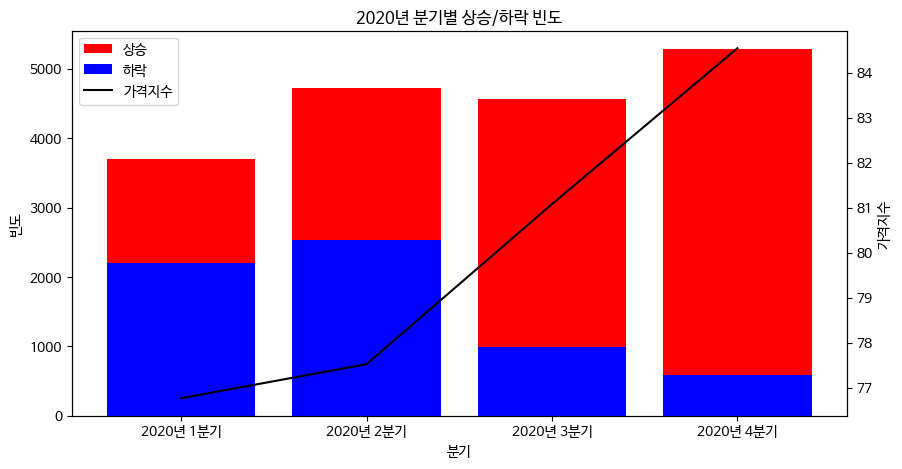

In [ ]:
import matplotlib.pyplot as plt

# 바 그래프 설정
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(df_2020_2words['date'], df_2020_2words['상승'], color='red', label='상승')
ax1.bar(df_2020_2words['date'], df_2020_2words['하락'], color='blue', label='하락')
ax1.set_ylabel('빈도')
ax1.set_xlabel('분기')
ax1.set_title('2020년 분기별 상승/하락 빈도')

# 꺾은선 그래프 설정
ax2 = ax1.twinx()
ax2.plot(df_2020_2words['date'], df_final['avg'][8:12], label='가격지수', color='black')
ax2.set_ylabel('가격지수')

# 범례 추가
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

In [ ]:
df_2020_2words

,date,상승,하락
0,2020년 1분기,3705,2198
1,2020년 2분기,4728,2527
2,2020년 3분기,4563,993
3,2020년 4분기,5285,587


In [ ]:
df_2020_2words.iloc[0, 1] + df_2020_2words.iloc[0, 2]

5903

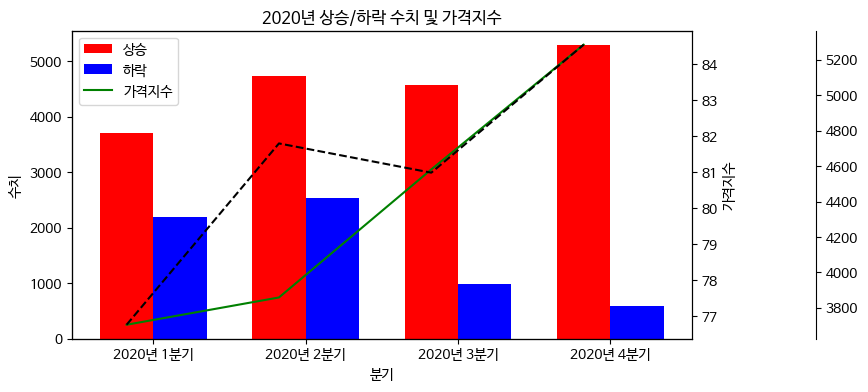

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 막대 그래프 그리기
bar_width = 0.35
r1 = np.arange(len(df_2020_2words['date']))
r2 = [x + bar_width for x in r1]

fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.bar(r1, df_2020_2words['상승'], color='red', width=bar_width, label='상승')
ax1.bar(r2, df_2020_2words['하락'], color='blue', width=bar_width, label='하락')

# ax2 생성하여 가격지수 그래프 추가
ax2 = ax1.twinx()
ax2.plot(df_2020_2words['date'], df_final['avg'][8:12], color='green', label='가격지수')

# ax3 생성하여 꺾은선그래프 추가
# ax3 = ax1.twinx()
# ax3.plot(df_2020_2words['date'], df_2020_2words['상승'], color='black', linestyle='--', label='상승/하락 비율')

# y축을 오른쪽으로 이동시키기
ax2.spines['right'].set_position(('axes', 1))
# ax3.spines['right'].set_position(('axes', 1.2))

# 축과 레이블 설정
ax1.set_xlabel('분기')
ax1.set_ylabel('수치')
ax1.set_xticks([r + bar_width / 2 for r in range(len(df_2020_2words['date']))])
ax1.set_xticklabels(df_2020_2words['date'])
ax1.set_title('2020년 상승/하락 수치 및 가격지수')
# ax1.legend(loc='upper left')
ax2.set_ylabel('가격지수')
# ax2.legend(loc='upper left')
# ax3.set_ylabel('상승/하락 비율')
# ax3.legend(loc='lower')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

<ipython-input-90-9b09ce517b3b>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_final['date'], rotation=90)


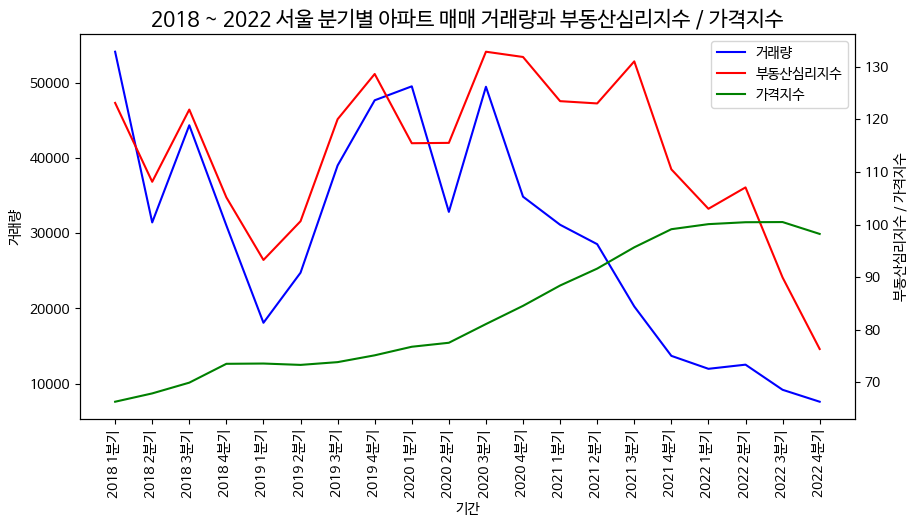

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# 왼쪽 y축 설정
ax1.set_ylabel('거래량')
ax1.plot(df_final['date'], df_final['서울'], label='거래량', color='blue')

# 오른쪽 y축 설정
ax2 = ax1.twinx()
ax2.set_ylabel('부동산심리지수 / 가격지수')
ax2.plot(df_final['date'], df_final['mean'], label='부동산심리지수', color='red')
ax2.plot(df_final['date'], df_final['avg'], label='가격지수', color='green')

# 그래프 타이틀 및 라벨 설정
ax1.set_xlabel('기간')
ax1.set_xticklabels(df_final['date'], rotation=90)
plt.title('2018 ~ 2022 서울 분기별 아파트 매매 거래량과 부동산심리지수 / 가격지수', fontsize=15)

# 범례 추가
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()

<ipython-input-91-94a13616f1b0>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_final['date'], rotation=90)


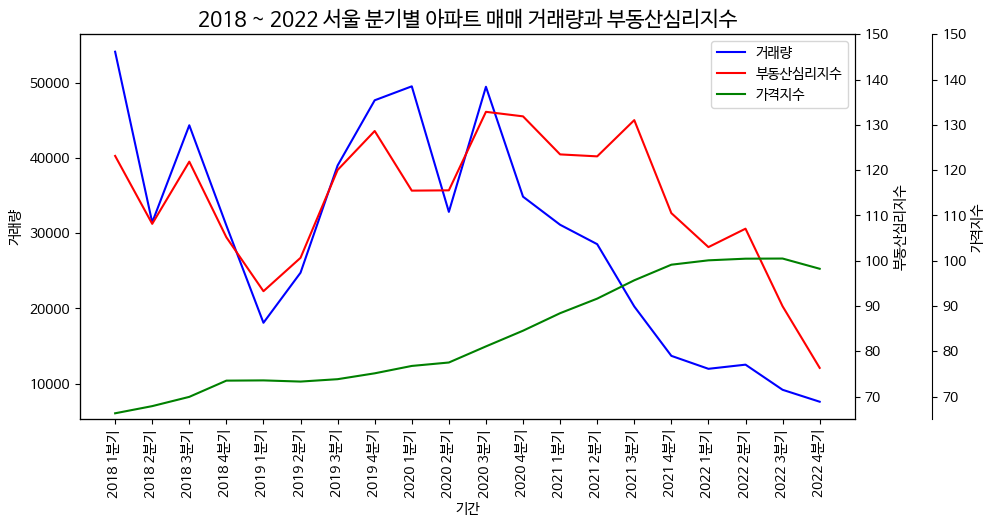

In [ ]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(10, 5))

# 거래량 시각화
ax1.plot(df_final['date'], df_final['서울'], label='거래량', color='blue')
ax1.set_xlabel('기간')
ax1.set_ylabel('거래량')
ax1.set_xticklabels(df_final['date'], rotation=90)

# 부동산심리지수 시각화
ax2 = ax1.twinx()
ax2.plot(df_final['date'], df_final['mean'], label='부동산심리지수', color='red')
ax2.set_ylabel('부동산심리지수')
ax2.set_ylim([65, 150])

# 가격지수 시각화
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.1))  # 오른쪽 y축 위치 조정
ax3.plot(df_final['date'], df_final['avg'], label='가격지수', color='green')
ax3.set_ylabel('가격지수')
ax3.set_ylim([65, 150])

# 그래프 타이틀, 범례 설정
plt.title('2018 ~ 2022 서울 분기별 아파트 매매 거래량과 부동산심리지수', fontsize=15)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')

# 그래프 출력
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

# 가격지수와 부동산심리지수를 스케일링합니다.
scaler = MinMaxScaler()
df_final[['mean', 'avg']] = scaler.fit_transform(df_final[['mean', 'avg']])

<ipython-input-12-f656849cbf43>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_final['date'], rotation=90)


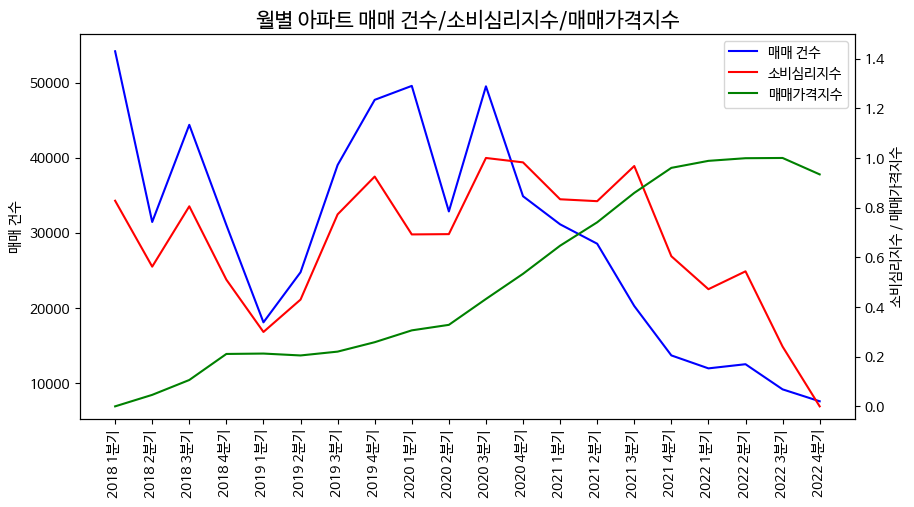

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# 왼쪽 y축 설정
ax1.set_ylabel('매매 건수')
ax1.plot(df_final['date'], df_final['서울'], label='매매 건수', color='blue')

# 오른쪽 y축 설정
ax2 = ax1.twinx()
ax2.set_ylabel('소비심리지수 / 매매가격지수')
ax2.plot(df_final['date'], df_final['mean'], label='소비심리지수', color='red')
ax2.plot(df_final['date'], df_final['avg'], label='매매가격지수', color='green')
ax2.set_ylim([-0.05, 1.5])

# 그래프 타이틀 및 라벨 설정
# ax1.set_xlabel('기간')
ax1.set_xticklabels(df_final['date'], rotation=90)
plt.title('월별 아파트 매매 건수/소비심리지수/매매가격지수', fontsize=15)

# 범례 추가
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()

<ipython-input-101-5ecacf675e97>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_final['date'], rotation=90)


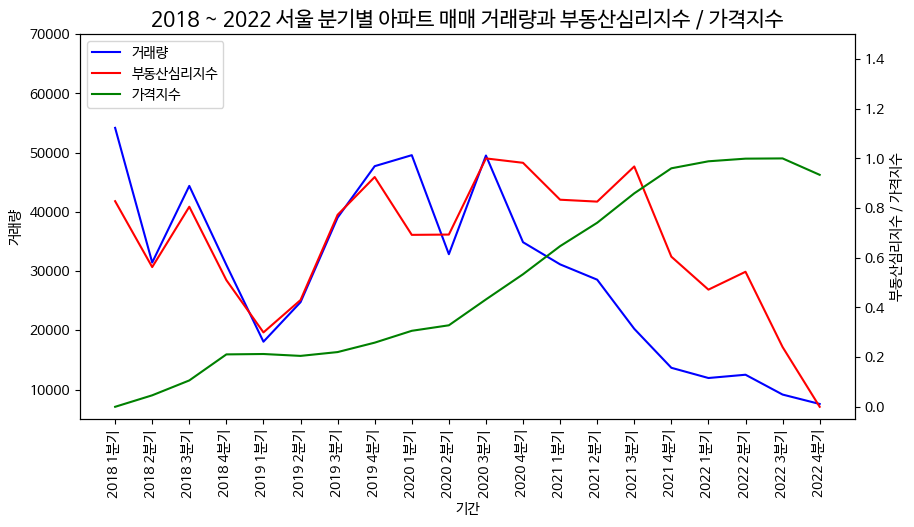

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# 왼쪽 y축 설정
ax1.set_ylabel('거래량')
ax1.plot(df_final['date'], df_final['서울'], label='거래량', color='blue')
ax1.set_ylim([5000, 70000])

# 오른쪽 y축 설정
ax2 = ax1.twinx()
ax2.set_ylabel('부동산심리지수 / 가격지수')
ax2.plot(df_final['date'], df_final['mean'], label='부동산심리지수', color='red')
ax2.plot(df_final['date'], df_final['avg'], label='가격지수', color='green')
ax2.set_ylim([-0.05, 1.5])

# 그래프 타이틀 및 라벨 설정
ax1.set_xlabel('기간')
ax1.set_xticklabels(df_final['date'], rotation=90)
plt.title('2018 ~ 2022 서울 분기별 아파트 매매 거래량과 부동산심리지수 / 가격지수', fontsize=15)

# 범례 추가
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()